In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [2]:
# load data for viscous Burger's equation
df = pd.read_csv('full-order_sol.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27665,27666,27667,27668,27669,27670,27671,27672,27673,27674
0,1.224647e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6.135885e-03,0.006115,0.006093,0.006071,0.006049,0.006026,0.006004,0.005982,0.005960,0.005939,...,0.001227,0.001226,0.001225,0.001224,0.001223,0.001222,0.001221,0.001220,0.001219,0.0
2,1.227154e-02,0.012228,0.012184,0.012139,0.012095,0.012050,0.012006,0.011962,0.011918,0.011875,...,0.002454,0.002452,0.002450,0.002448,0.002446,0.002444,0.002442,0.002441,0.002439,0.0
3,1.840673e-02,0.018340,0.018273,0.018206,0.018139,0.018072,0.018006,0.017939,0.017874,0.017808,...,0.003681,0.003678,0.003675,0.003672,0.003669,0.003666,0.003664,0.003661,0.003658,0.0
4,2.454123e-02,0.024451,0.024360,0.024271,0.024181,0.024092,0.024003,0.023915,0.023827,0.023740,...,0.004907,0.004904,0.004900,0.004896,0.004892,0.004888,0.004885,0.004881,0.004877,0.0


In [3]:
# dimension of full order solution
df.shape

(1025, 27675)

In [4]:
Mu = np.arange(1,7.75,0.25)
Mu.shape

(27,)

In [5]:
row = []
for i in range(df.shape[0]):
    if i%4 == 0:
        row.append(i)

col = []
for j in range(df.shape[1]):
    if j%4 == 0:
        col.append(j)

print(len(row))
print(len(col))

257
6919


In [6]:
S = df.iloc[row,col]
S.shape

(257, 6919)

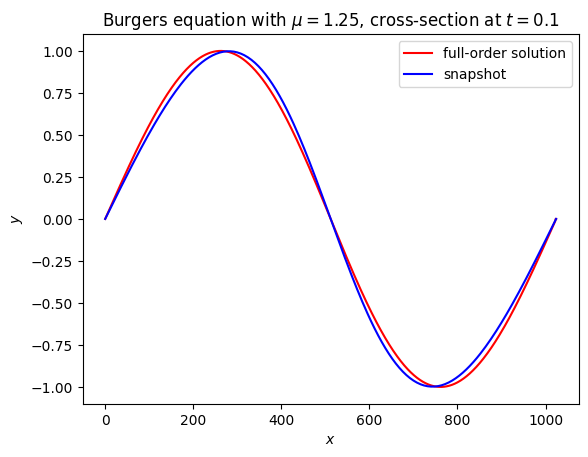

In [7]:
plt.plot(df.iloc[:,10],'r',label='full-order solution')
plt.plot(S.iloc[:,10],'b', label='snapshot')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Burgers equation with $\mu = 1.25$, cross-section at $t=0.1$')
plt.legend()

## 1. RB 

In [8]:
from scipy.linalg import svd

def RB(S,L):
    ### Inputs:
    # S: snapshots of size (N_h x N_s)
    # L: rank of approximation solution, L << min(N_h, N_s)

    ### Outputs:,
    # V: first L columns of U, where S = UAZ'
    # Q: collection of coefficient associated with column bases of V
    # U_rb: the reduced order solution
    
    U, s, VT = svd(S)
    
    V = U[0:S.shape[0],0:L]
    print(V.shape)
    Q = V.T @ S
    print(Q.shape)
    U_rb = V @ Q
    print(U_rb.shape)
    
    D = np.diag(s)**2
    print(sum(s))
    # display projection error
    print('projection error =', sum(s[L:s.shape[0]]))
    
    return(V, Q, U_rb)

In [9]:
V, Q, U_rb = RB(S, L = 10) # approximation rank = 10

(257, 10)
(10, 6919)
(257, 6919)
904.1158528835741
projection error = 0.9482765231334919


In [10]:
V, Q, U_rb = RB(S, L = 7) # approximation rank = 7

(257, 7)
(7, 6919)
(257, 6919)
904.1158528835741
projection error = 3.5147763680418795


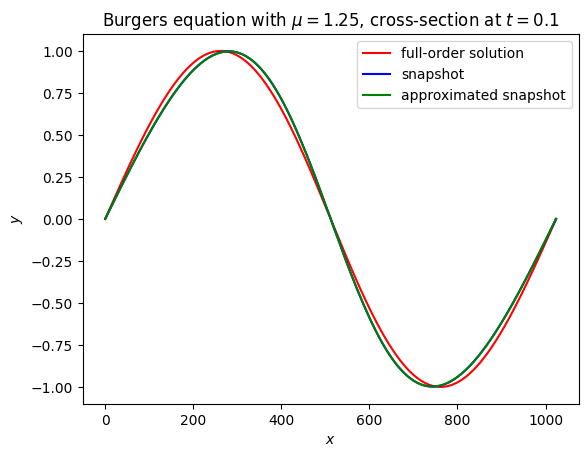

In [11]:
plt.plot(df.iloc[:,10],'r',label='full-order solution')
plt.plot(S.iloc[:,10],'b', label='snapshot')
plt.plot(np.array(row),U_rb.iloc[:,10],'g', label='approximated snapshot')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Burgers equation with $\mu = 1.25$, cross-section at $t=0.1$')
plt.legend()
plt.savefig('Burgers_mu_1.25_t=0.1.png')
plt.show()

## Construct data to train regression model

In [12]:
S

,0,4,8,12,16,20,24,28,32,36,...,27636,27640,27644,27648,27652,27656,27660,27664,27668,27672
0,1.224647e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.454123e-02,0.024181,0.023827,0.023481,0.023145,0.022817,0.022498,0.022187,0.021885,0.021590,...,0.005020,0.005004,0.004988,0.004973,0.004957,0.004942,0.004926,0.004911,0.004896,0.004881
8,4.906767e-02,0.048334,0.047621,0.046928,0.046254,0.045598,0.044960,0.044339,0.043735,0.043147,...,0.010040,0.010008,0.009976,0.009945,0.009914,0.009883,0.009853,0.009822,0.009792,0.009762
12,7.356456e-02,0.072457,0.071383,0.070340,0.069327,0.068343,0.067386,0.066455,0.065550,0.064668,...,0.015059,0.015011,0.014964,0.014917,0.014871,0.014824,0.014778,0.014733,0.014687,0.014642
16,9.801714e-02,0.096538,0.095104,0.093713,0.092362,0.091049,0.089774,0.088534,0.087327,0.086153,...,0.020078,0.020014,0.019951,0.019889,0.019827,0.019765,0.019704,0.019643,0.019582,0.019522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,-9.801714e-02,-0.096502,-0.095037,-0.093627,-0.092271,-0.090961,-0.089692,-0.088461,-0.087264,-0.086099,...,-0.018999,-0.018939,-0.018879,-0.018820,-0.018761,-0.018703,-0.018644,-0.018587,-0.018529,-0.018472
1012,-7.356456e-02,-0.072423,-0.071344,-0.070323,-0.069340,-0.068385,-0.067454,-0.066546,-0.065659,-0.064794,...,-0.013987,-0.013943,-0.013899,-0.013855,-0.013812,-0.013769,-0.013726,-0.013684,-0.013641,-0.013599
1016,-4.906767e-02,-0.048344,-0.047729,-0.047119,-0.046507,-0.045897,-0.045293,-0.044698,-0.044114,-0.043541,...,-0.008975,-0.008947,-0.008919,-0.008891,-0.008863,-0.008835,-0.008808,-0.008781,-0.008753,-0.008726
1020,-2.454123e-02,-0.024551,-0.024376,-0.024117,-0.023829,-0.023532,-0.023231,-0.022933,-0.022637,-0.022347,...,-0.003964,-0.003951,-0.003939,-0.003926,-0.003914,-0.003902,-0.003890,-0.003878,-0.003866,-0.003854


In [13]:
n = len(row) #257
y = []
t = []
for i in range(len(Mu)-1):
    # print(i)
    S_i = np.array(S.iloc[:,257*i:257*(i+1)])
    # print(np.reshape(S_i, 257*257,order='F'))
    for j in range(n):
        # print(S_i[j])
        y.append(S_i[j])
        t.append(j*4*(1/1024))

In [14]:
n = len(row) #257
y = []
t = []
for i in range(len(Mu)-1):
    # print(i)
    S_i = np.array(S.iloc[:,257*i:257*(i+1)])
    # print(np.reshape(S_i, 257*257,order='F'))
    y.append(np.reshape(S_i, 257*257,order='F'))
    t.append(list(row)*257)

In [15]:
t = np.array(t)
y = np.array(y)

In [16]:
# Train GPR for different instance of mu
rng = np.random.RandomState(13)
training_indices = rng.choice(np.arange(26), size=int(0.8*26), replace=False)
print(training_indices)
#X_train = np.concatenate((Mu[training_indices].reshape(-1,1),t[training_indices*257]),axis=1)
#y_train = y[training_indices]

[ 8 19  1 11 15  7 22 25  0 17  4  9 23 13  5 21 14 20  3 12]


In [17]:
def train_loader(S,train_indices):
    n = len(row) #257
    y_train = []
    X_train = []
    for i in training_indices:
        # print(i)
        S_i = np.array(S.iloc[:,257*i:257*(i+1)])
        # print(np.reshape(S_i, 257*257,order='F'))
        for j in range(n):
            # print(S_i[j])
            y_train.append(S_i[:,j])
            X_train.append(np.array([Mu[i],j*4*(1/1024)]))
    return (X_train, y_train)

In [20]:
X_train, y_train = train_loader(S,training_indices)

In [65]:
X_train[1]

array([3.        , 0.00390625])

In [22]:
y_train[0]

array([ 0.00000000e+00,  2.24238399e-02,  4.48270705e-02,  6.72017223e-02,
        8.95395001e-02,  1.11831733e-01,  1.34069365e-01,  1.56242991e-01,
        1.78342909e-01,  2.00359194e-01,  2.22281759e-01,  2.44100418e-01,
        2.65804925e-01,  2.87385006e-01,  3.08830376e-01,  3.30130756e-01,
        3.51275871e-01,  3.72255463e-01,  3.93059290e-01,  4.13677125e-01,
        4.34098764e-01,  4.54314024e-01,  4.74312744e-01,  4.94084789e-01,
        5.13620052e-01,  5.32908454e-01,  5.51939949e-01,  5.70704523e-01,
        5.89192198e-01,  6.07393038e-01,  6.25297145e-01,  6.42894665e-01,
        6.60175795e-01,  6.77130779e-01,  6.93749915e-01,  7.10023560e-01,
        7.25942130e-01,  7.41496107e-01,  7.56676040e-01,  7.71472553e-01,
        7.85876346e-01,  7.99878201e-01,  8.13468986e-01,  8.26639663e-01,
        8.39381289e-01,  8.51685023e-01,  8.63542135e-01,  8.74944006e-01,
        8.85882139e-01,  8.96348163e-01,  9.06333842e-01,  9.15831079e-01,
        9.24831924e-01,  

In [23]:
test_indices = np.delete(np.arange(len(Mu)-1),training_indices)
print(test_indices)

[ 2  6 10 16 18 24]


In [24]:
def test_loader(S,test_indices):
    n = len(row) #257
    y_test = []
    X_test = []
    for i in test_indices:
        # print(i)
        S_i = np.array(S.iloc[:,257*i:257*(i+1)])
        # print(np.reshape(S_i, 257*257,order='F'))
        for j in range(n):
            # print(S_i[j])
            y_test.append(S_i[:,j])
            X_test.append(np.array([Mu[i],j*4*(1/1024)]))
    return (X_test, y_test)

In [25]:
X_test, y_test = test_loader(S,test_indices)

In [26]:
len(X_test)

1542

In [28]:
y_test[0].shape

(257,)

### Make predictions with GPR

In [158]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

0.396**2 * RBF(length_scale=0.383)

In [256]:
def plot_GPR_full(tt,mu,timestamp,n_mu):
    X = np.concatenate((np.array([mu]),tt)).reshape(1,-1)
    mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)
    #print(std_prediction)
    
    mean = mean_prediction.reshape(257,257)[timestamp]
    #print(mean.shape)
    
    plt.plot(df.iloc[:,timestamp+1024*n_mu],'r',label='full-order solution')
    # plt.plot(S.iloc[:,10],'b', label='snapshot')
    t = np.array(row)
    plt.plot(t,U_rb.iloc[:,timestamp+257*n_mu],'y', label='approximated snapshot')
    # plt.plot(X, y, label="learned snapshot", linestyle="dotted")
    # plt.scatter(X_train, y_train, label="Observations")
 
    plt.plot(t, mean, label="regression mean prediction",linestyle="dotted")
    plt.fill_between(
        t.ravel(),
        mean - 1.96 * std_prediction,
        mean + 1.96 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$u$")
    _ = plt.title(f"Gaussian process regression on noise-free dataset with $\mu=${mu}")

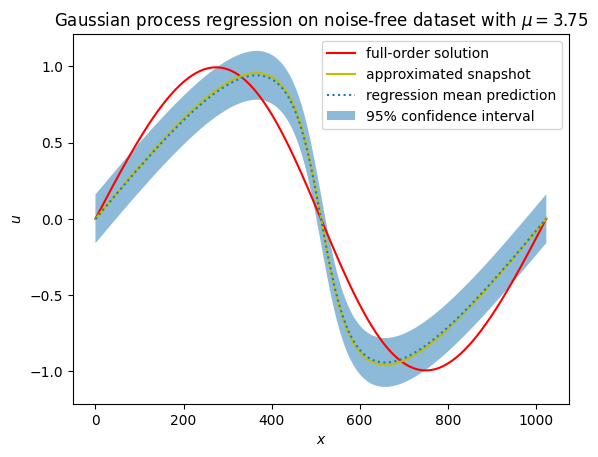

In [257]:
tt = t[0]
plot_GPR_full(tt,mu=Mu[11],timestamp=40,n_mu=11)

## 3. Train a neural network

#### Train (Offline)
Input:
- Collection of snapshot $S$
- Values of parameter $\mu$

Output:
- Orthogonal bases $V$ of rank $L$
- Regression model $\hat{q}(·; ·)$

$\rightarrow$ Model: Two-layer fully connected neural network

$\rightarrow$ Parameters:
* Hidden dimension: 500
* Input: ($\mu$,$t$) (dim=2)
* Output: reduced-basis solution (dim=257)

#### Inference (Online)
Input:
- New value ($\mu$,$t$)

Output
- Reduced-basis solution of $u$ depends on $x$

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from typing import Optional, List, Tuple, Dict


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [30]:
class SingleLayerMLP(nn.Module):
    """constructing a single layer neural network with Pytorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(SingleLayerMLP, self).__init__()
        self.hidden_layer = nn.Linear(indim, hidden_layer)
        self.output = nn.Linear(hidden_layer, outdim)
        self.activation = nn.ReLU()


    def forward(self, x):
        """
        x shape (batch_size, input_dim)
        """
        x = x.to(self.hidden_layer.weight.dtype)
        hidden = self.hidden_layer(x)
        activate = self.activation(hidden)
        output = self.output(activate)
        return output
    
class TwoLayerMLP(nn.Module):
    """constructing a single layer neural network with Pytorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(TwoLayerMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(indim, hidden_layer)
        self.hidden_layer2 = nn.Linear(hidden_layer, hidden_layer)
        self.output = nn.Linear(hidden_layer, outdim)
        self.activation = nn.ReLU()
        # raise NotImplementedError()


    def forward(self, x):
        """
        x shape (batch_size, input_dim)
        """
        x = x.to(self.hidden_layer1.weight.dtype)
        hidden = self.hidden_layer1(x)
        hidden = self.hidden_layer2(hidden)
        activate = self.activation(hidden)
        output = self.output(activate)
        return output
    


class DS(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.length = len(X)
        self.X = X
        self.Y = Y

    def __getitem__(self, idx):
        x = self.X[idx, :]
        y = self.Y[idx, :]
        return (x, y)

    def __len__(self):
        return self.length


def validate(model, loader, loss_fnc, optimizer):
    """takes in a dataloader, then returns the model loss and accuracy on this loader"""
    
    with torch.no_grad():
        total_loss = 0
        total_correct = 0
        total_samples = 0
        
        model.eval()
        for x, y in loader:
            x, y = x.to(device), y.to(device).float()
            outputs = model(x)
            loss = loss_fnc(outputs, y)
            total_loss += loss.item() * x.shape[0]
            #predictions = outputs.argmax(dim=1)
            #total_correct += (predictions == y).sum().item()
            total_samples += x.shape[0]
            
        # Calculate the average loss and accuracy
        average_loss = total_loss / total_samples
        #average_accuracy = total_correct / total_samples

        return average_loss #, average_accuracy


def train(model, train_loader, criterion, optimizer):
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).float()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.shape[0]
        #predictions = outputs.argmax(dim=1)
        #total_correct += (predictions == y).sum().item()
        total_samples += x.shape[0]

    # Calculate the average loss and accuracy
    average_loss = total_loss / total_samples
    #average_accuracy = total_correct / total_samples

    return average_loss #, average_accuracy

In [78]:
if __name__ == "__main__":

    indim = 2
    outdim = 257
    hidden_dim = 800
    lr = 0.01
    batch_size = 32
    epochs = 200

    #dataset
    Xtrain = np.array(X_train) # np.loadtxt("data/XTrain.txt", delimiter="\t")
    Ytrain = np.array(y_train) # np.loadtxt("data/yTrain.txt", delimiter="\t").astype(int)
    m1, n1 = Xtrain.shape
    print(m1, n1)
    train_ds = DS(Xtrain, Ytrain)
    train_loader = DataLoader(train_ds, batch_size=batch_size)

    Xtest = np.array(X_test) # np.loadtxt("data/XTest.txt", delimiter="\t")
    Ytest = np.array(y_test) # np.loadtxt("data/yTest.txt", delimiter="\t").astype(int)
    m2, n2 = Xtest.shape
    print(m1, n2)
    test_ds = DS(Xtest, Ytest)
    test_loader = DataLoader(test_ds, batch_size=batch_size)

    #construct the model
    model = TwoLayerMLP(indim, outdim, hidden_dim).to(device)

    # Define the loss function
    loss_fnc = nn.MSELoss()

    # Define the optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    #construct the training process
    #train_losses, train_accs, test_losses, test_accs = [], [], [], []
    train_losses, test_losses = [], []
    for epoch in range(epochs):
        # Train the model
        train_loss = train(model, train_loader, loss_fnc, optimizer)
        train_losses.append(train_loss)
        #train_accs.append(train_acc)

        # Evaluate the model on the test set
        test_loss = validate(model, test_loader, loss_fnc, optimizer)
        test_losses.append(test_loss)
        #test_accs.append(test_acc)

        # Print the results for this epoch
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={test_loss:.4f}")

5140 2
5140 2
Epoch 1: Train Loss=0.0939, Test Loss=0.0679
Epoch 2: Train Loss=0.0616, Test Loss=0.0592
Epoch 3: Train Loss=0.0542, Test Loss=0.0515
Epoch 4: Train Loss=0.0476, Test Loss=0.0449
Epoch 5: Train Loss=0.0420, Test Loss=0.0392
Epoch 6: Train Loss=0.0372, Test Loss=0.0344
Epoch 7: Train Loss=0.0331, Test Loss=0.0306
Epoch 8: Train Loss=0.0299, Test Loss=0.0276
Epoch 9: Train Loss=0.0272, Test Loss=0.0252
Epoch 10: Train Loss=0.0250, Test Loss=0.0232
Epoch 11: Train Loss=0.0232, Test Loss=0.0216
Epoch 12: Train Loss=0.0217, Test Loss=0.0202
Epoch 13: Train Loss=0.0204, Test Loss=0.0191
Epoch 14: Train Loss=0.0193, Test Loss=0.0181
Epoch 15: Train Loss=0.0184, Test Loss=0.0173
Epoch 16: Train Loss=0.0177, Test Loss=0.0166
Epoch 17: Train Loss=0.0170, Test Loss=0.0161
Epoch 18: Train Loss=0.0165, Test Loss=0.0156
Epoch 19: Train Loss=0.0161, Test Loss=0.0152
Epoch 20: Train Loss=0.0157, Test Loss=0.0149
Epoch 21: Train Loss=0.0154, Test Loss=0.0147
Epoch 22: Train Loss=0.0152, 

Epoch 178: Train Loss=0.0088, Test Loss=0.0086
Epoch 179: Train Loss=0.0088, Test Loss=0.0086
Epoch 180: Train Loss=0.0088, Test Loss=0.0086
Epoch 181: Train Loss=0.0087, Test Loss=0.0085
Epoch 182: Train Loss=0.0087, Test Loss=0.0085
Epoch 183: Train Loss=0.0087, Test Loss=0.0085
Epoch 184: Train Loss=0.0087, Test Loss=0.0085
Epoch 185: Train Loss=0.0086, Test Loss=0.0084
Epoch 186: Train Loss=0.0086, Test Loss=0.0084
Epoch 187: Train Loss=0.0086, Test Loss=0.0084
Epoch 188: Train Loss=0.0086, Test Loss=0.0084
Epoch 189: Train Loss=0.0085, Test Loss=0.0083
Epoch 190: Train Loss=0.0085, Test Loss=0.0083
Epoch 191: Train Loss=0.0085, Test Loss=0.0083
Epoch 192: Train Loss=0.0085, Test Loss=0.0083
Epoch 193: Train Loss=0.0084, Test Loss=0.0083
Epoch 194: Train Loss=0.0084, Test Loss=0.0082
Epoch 195: Train Loss=0.0084, Test Loss=0.0082
Epoch 196: Train Loss=0.0084, Test Loss=0.0082
Epoch 197: Train Loss=0.0084, Test Loss=0.0082
Epoch 198: Train Loss=0.0083, Test Loss=0.0081
Epoch 199: Tr

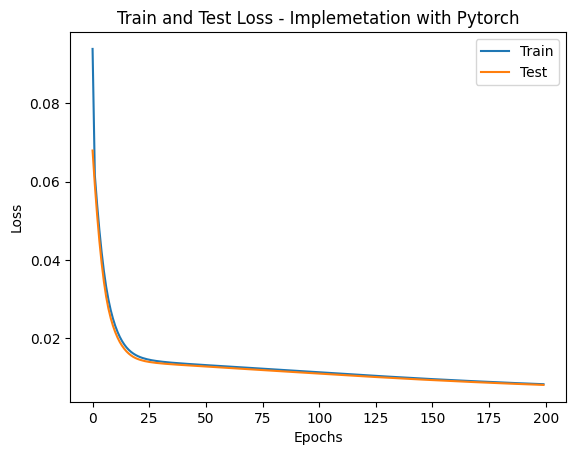

In [79]:
# plot training and testing losses
plt.plot(np.arange(epochs), np.array(train_losses), label="Train")
plt.plot(np.arange(epochs), np.array(test_losses), label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Train and Test Loss - Implemetation with Pytorch')
plt.legend()
plt.savefig('nn_loss2.png')
plt.show()

In [88]:
def plot_nn_full(tt,mu,timestamp,n_mu):
    time = tt[timestamp]/1024
    X = np.array([mu,time])
    X = torch.tensor(X).float()
    print(X)
    prediction = model(X)
    #print(std_prediction)
    
    pred = prediction #.reshape(257,257)[timestamp]
    #print(mean.shape)
    
    plt.plot(df.iloc[:,(timestamp+256*n_mu)*4],'r',label='full-order solution')
    # plt.plot(S.iloc[:,10],'b', label='snapshot')
    t = np.array(row)
    plt.plot(t,U_rb.iloc[:,(timestamp+256*n_mu)],'y', label='approximated snapshot')
    # plt.plot(X, y, label="learned snapshot", linestyle="dotted")
    # plt.scatter(X_train, y_train, label="Observations")
 
    plt.plot(t, pred.detach().numpy(), label="Neural network regression prediction") #,linestyle="dotted")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$u$")
    _ = plt.title(f"Neural network regression on noise-free dataset with $\mu=${mu}, $t=${time}")
    plt.savefig(f'NN_rb_mu={mu}_t={time}.png')
    plt.show()

In [36]:
test_indices

array([ 2,  6, 10, 16, 18, 24])

In [85]:
tt = t[0][0:257]
print(tt)
#plot_nn_full(tt,mu=Mu[16],timestamp=40,n_mu=16)

[   0    4    8   12   16   20   24   28   32   36   40   44   48   52
   56   60   64   68   72   76   80   84   88   92   96  100  104  108
  112  116  120  124  128  132  136  140  144  148  152  156  160  164
  168  172  176  180  184  188  192  196  200  204  208  212  216  220
  224  228  232  236  240  244  248  252  256  260  264  268  272  276
  280  284  288  292  296  300  304  308  312  316  320  324  328  332
  336  340  344  348  352  356  360  364  368  372  376  380  384  388
  392  396  400  404  408  412  416  420  424  428  432  436  440  444
  448  452  456  460  464  468  472  476  480  484  488  492  496  500
  504  508  512  516  520  524  528  532  536  540  544  548  552  556
  560  564  568  572  576  580  584  588  592  596  600  604  608  612
  616  620  624  628  632  636  640  644  648  652  656  660  664  668
  672  676  680  684  688  692  696  700  704  708  712  716  720  724
  728  732  736  740  744  748  752  756  760  764  768  772  776  780
  784 

In [86]:
len(tt[0:257])

257

[194 253 153   6 252  96 164  52 133 126 248 238]
tensor([5.0000, 0.7578])


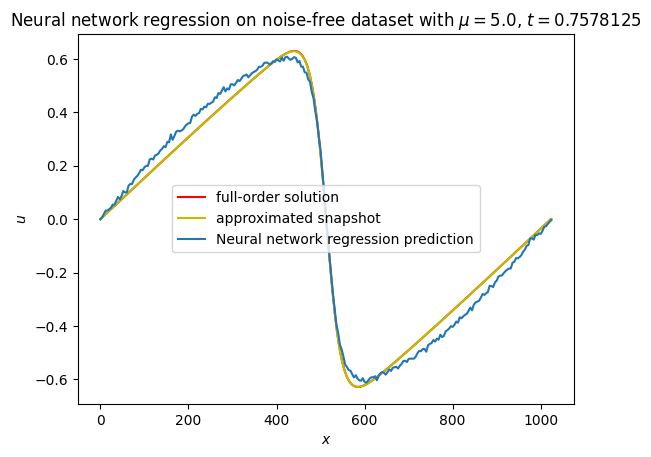

tensor([5.0000, 0.9883])


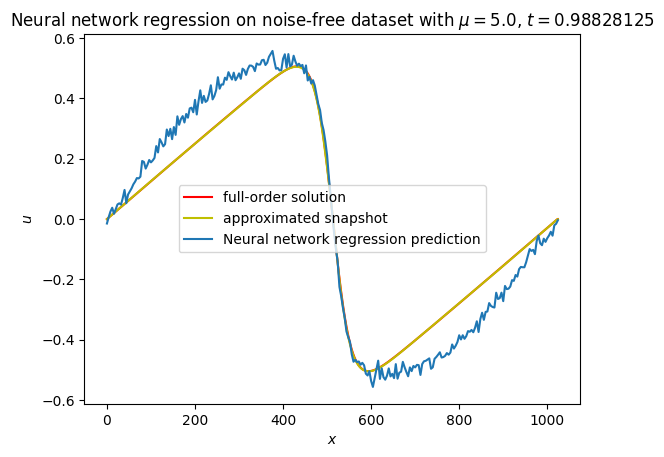

tensor([5.0000, 0.5977])


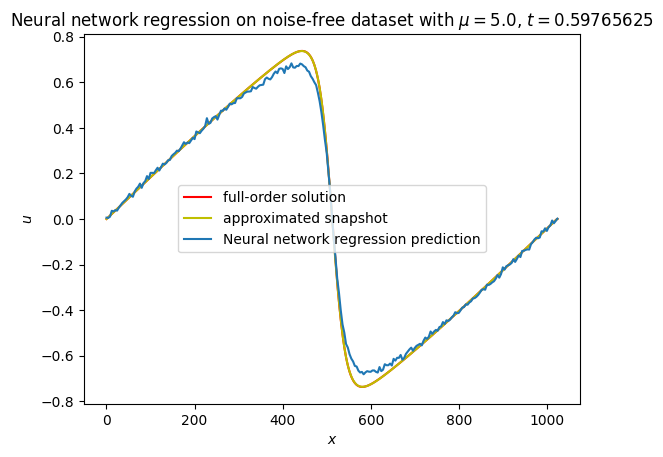

tensor([5.0000, 0.0234])


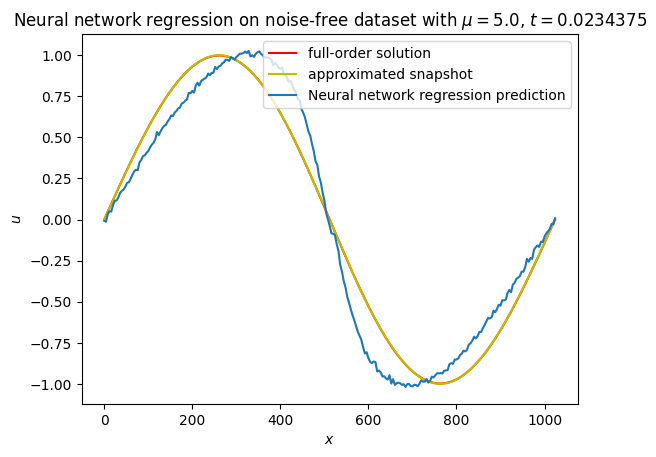

tensor([5.0000, 0.9844])


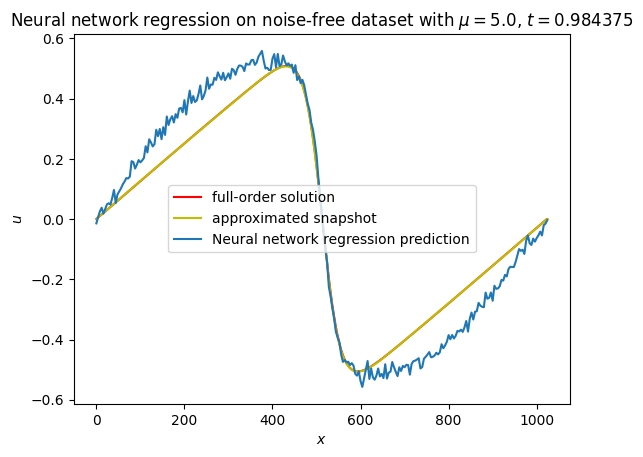

tensor([5.0000, 0.3750])


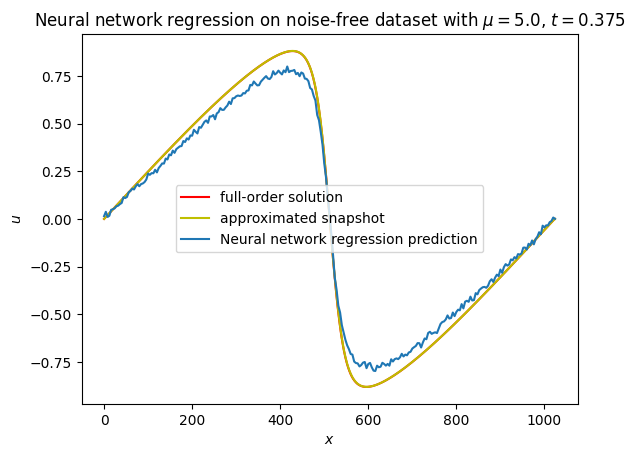

tensor([5.0000, 0.6406])


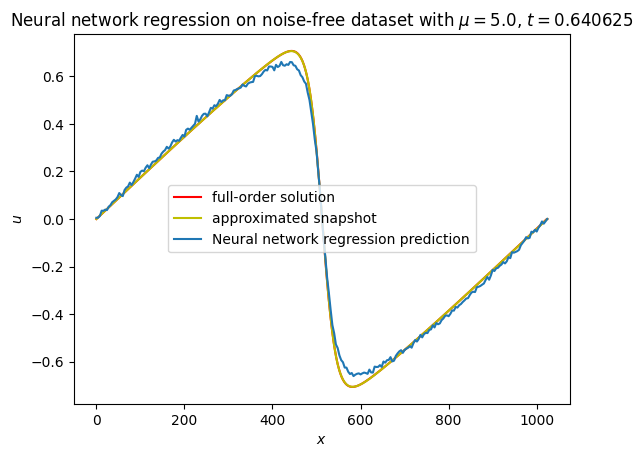

tensor([5.0000, 0.2031])


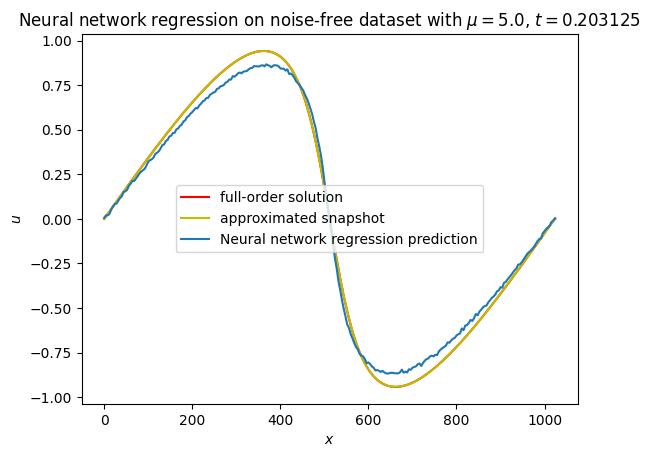

tensor([5.0000, 0.5195])


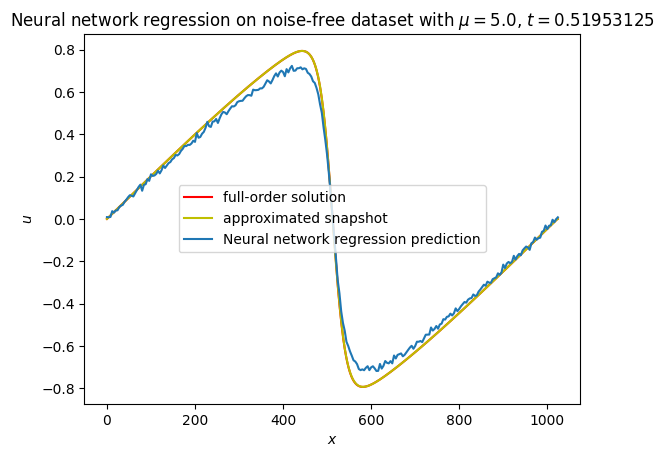

tensor([5.0000, 0.4922])


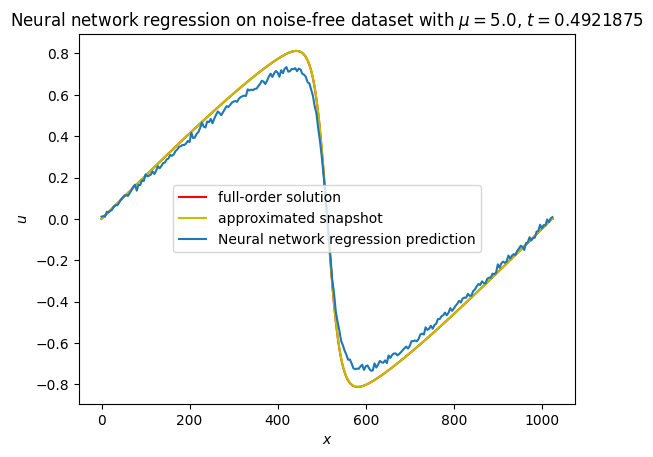

tensor([5.0000, 0.9688])


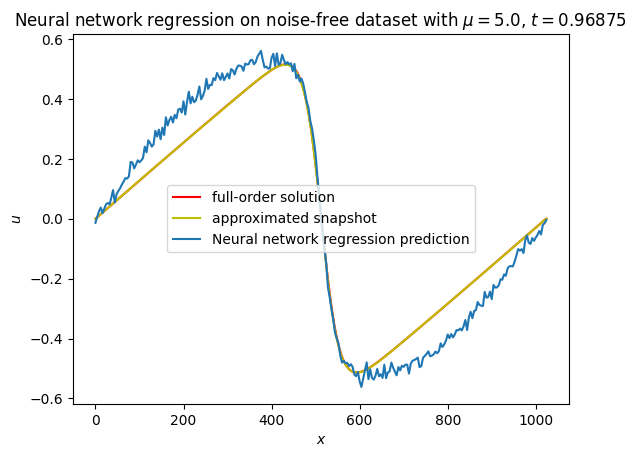

tensor([5.0000, 0.9297])


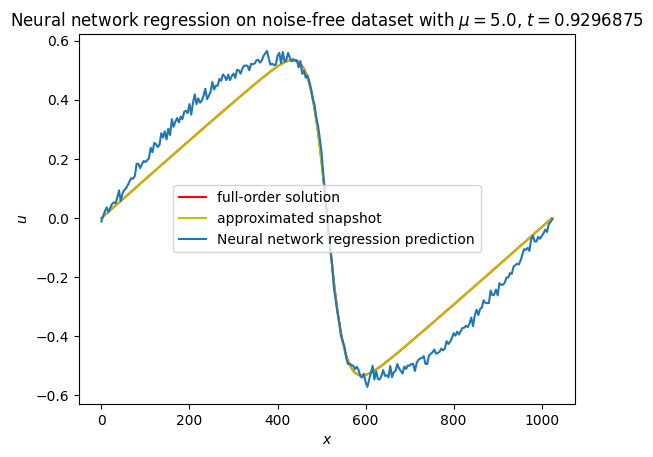

In [89]:
t_plot = rng.choice(range(len(tt)), size=int(0.05*len(tt)), replace=False)
print(t_plot)
for i in t_plot:
    plot_nn_full(tt,mu=Mu[16],timestamp=i,n_mu=16)